In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc


import warnings
warnings.filterwarnings(action = 'ignore')

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from matplotlib.legend_handler import HandlerLine2D

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix , f1_score , accuracy_score , classification_report , log_loss
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('Preprocessed_03.csv')

In [3]:
X = df.drop('Target_Flag', axis = 1)
y = df['Target_Flag']

In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.columns[:-1])
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=100)

In [5]:
def evaluate_model(model, class_balance, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

In [6]:
def get_roc_auc(y_test, predicted_proba):
    fpr, tpr, _ = roc_curve(y_test, predicted_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [7]:
knn = KNeighborsClassifier()
model = knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)
y_proba =knn.predict_proba(X_test)




In [8]:

custom_threshold = 0.1
y_custom_pred = (y_proba >= custom_threshold).astype(int)

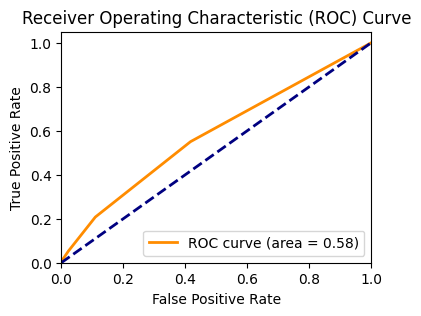

In [9]:
get_roc_auc(y_test, y_proba[:,1])

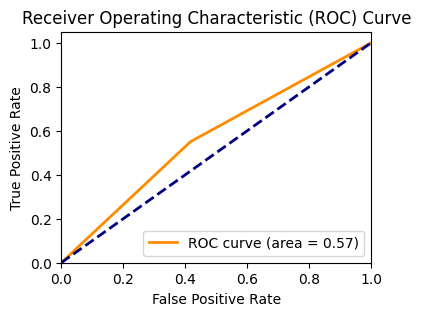

In [10]:
get_roc_auc(y_test, y_custom_pred[:,1])

In [11]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [12]:
best_params = grid_search.best_params_


In [13]:
best_params

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [14]:
best_rf_classifier = KNeighborsClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

In [15]:
y_proba = best_rf_classifier.predict_proba(X_test)

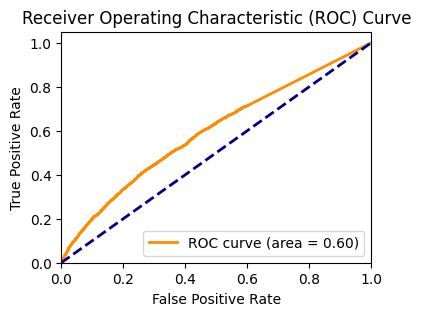

In [16]:
get_roc_auc(y_test, y_proba[:,1])

In [17]:
df1 = df.copy()

In [18]:
df1

,Customer_No,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
0,1,3,38,100.0,5,0.0,1,0.285714,19.0,0.750,46,0,5527.0,15,0
1,2,1,68,100.0,1,0.0,1,0.000000,2.0,0.500,33,0,12104.0,2,0
2,3,1,39,50.0,3,0.0,1,0.200000,25.0,1.000,28,1,153179.0,8,0
3,4,0,76,100.0,0,0.0,0,0.000000,0.0,0.500,26,2,181589.0,6,0
4,5,3,23,33.0,11,0.0,1,0.250000,19.0,0.375,28,1,10661.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81226,81249,1,100,100.0,3,0.0,1,0.000000,5.0,0.500,26,3,134411.0,7,0
81227,81250,2,100,100.0,7,0.0,1,0.333333,1.0,0.500,34,0,11745.0,14,0
81228,81251,0,100,100.0,2,0.0,1,0.000000,0.0,0.500,32,1,9367.0,12,0
81229,81252,2,100,0.0,1,0.0,1,0.375000,21.0,0.400,30,0,10149.0,10,0


In [ ]:
df = pd.read_csv(val)